In [6]:
# Load external libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
# Load data file and verify

fruits = pd.read_csv('Fruit.csv')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
# Create a mapping from fruit label value to fruit name to make results easier to interpret

lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

/srv/conda/envs/notebook/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:96: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


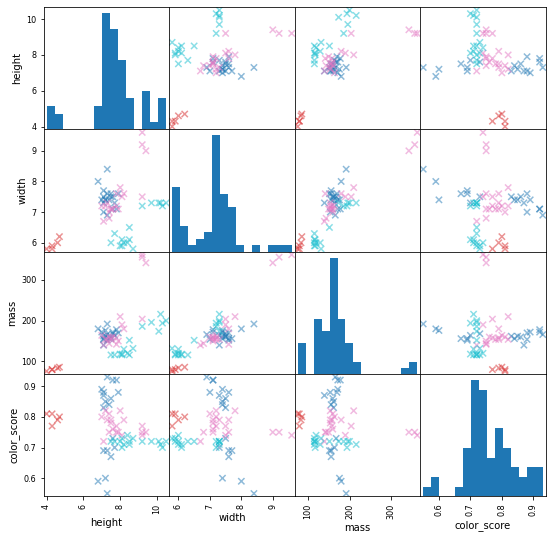

In [9]:
# Examine the data

from matplotlib import cm
from pandas.plotting import scatter_matrix

x = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

cmap = cm.get_cmap('tab10')
scatter = scatter_matrix(x, c=y, marker='x', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap, edgecolor="none")

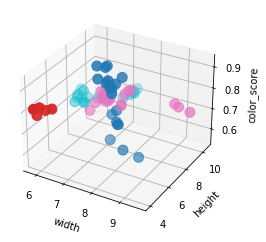

In [10]:
# Plotting a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
cmap = cm.get_cmap('tab10')
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['width'], x['height'], x['color_score'], c=y, marker='o', s=100, cmap=cmap)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [11]:
# Create train/test split
# We use only the mass, width, and height features of each fruit instance

x = fruits[['mass', 'width', 'height']].values
y = fruits['fruit_label']

# Default is 75% / 25% train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [14]:
# Create classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.5333333333333333

In [15]:
# Use the trained k-NN classifier model to classify new, previously unseen objects

# Example 1 : A small fruit with mass 20g, width 4.3 cm, height 5.5 cm

fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [16]:
# Example 2 : A larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

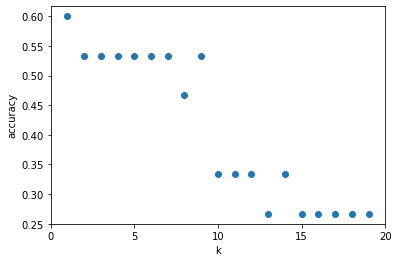

In [17]:
# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20]);

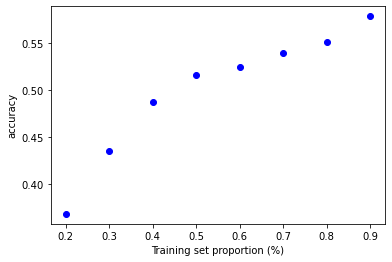

In [43]:
# How sensitive is k-NN classification accuracy to the train/test split proportion?

t = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1,1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1-s)
        knn.fit(x_train, y_train)
        scores.append(knn.score(x_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy');